In [1]:
!pip install pydot
!pip install graphviz
import pandas as pd
import numpy as np
import seaborn as sns
import pydot
import matplotlib.pyplot as plt
from pandas import DataFrame

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
print(df.shape)

(284807, 31)


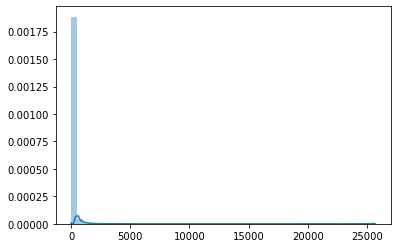

In [4]:
amount = [df['Amount'].values]
sns.distplot(amount)


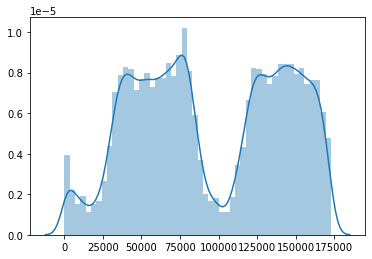

In [5]:
time = df['Time'].values
sns.distplot(time)

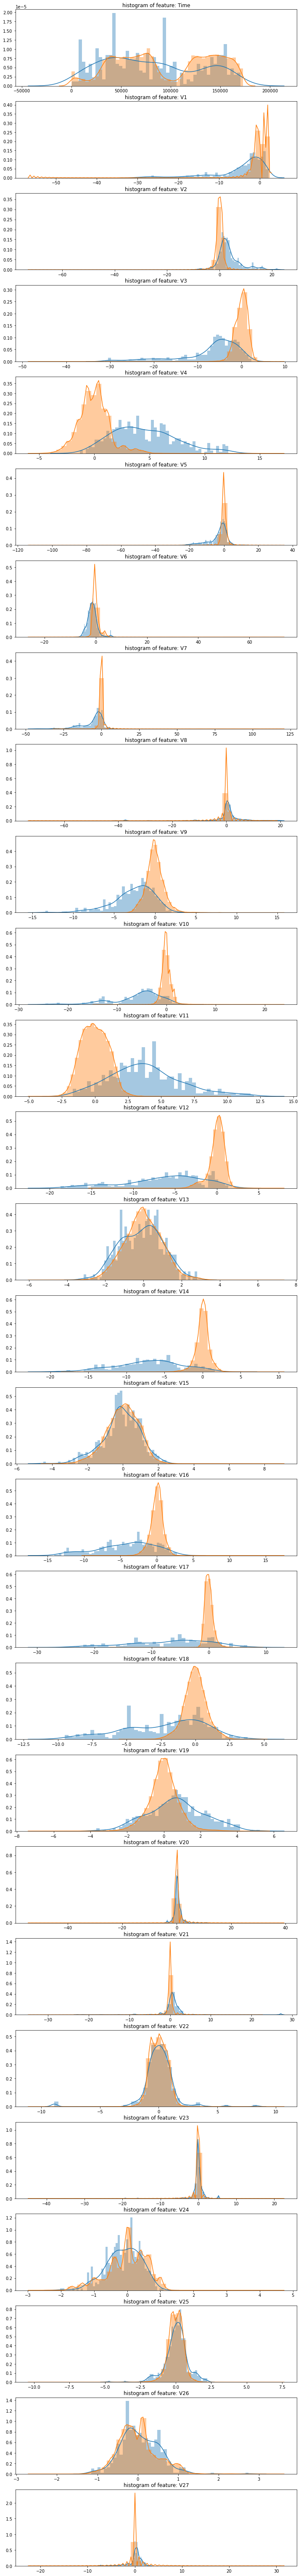

In [6]:
from matplotlib import gridspec

# distribution of anomalous features
features = df.iloc[:,0:28].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[c][df.Class == 1], bins=50)
    sns.distplot(df[c][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

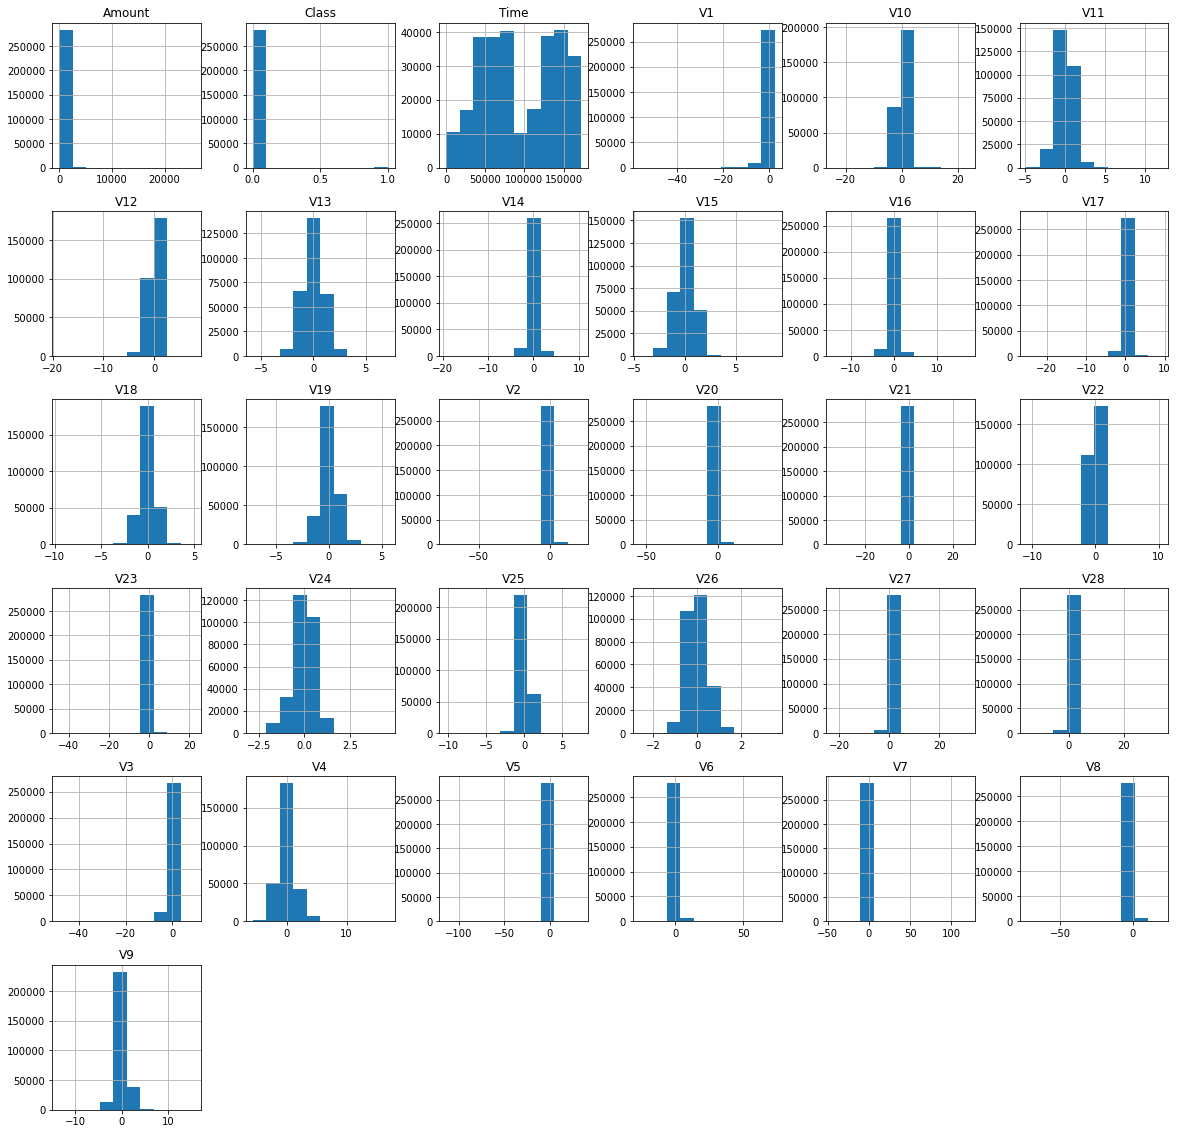

In [7]:
# Plot histograms of each parameter 
df.hist(figsize = (20, 20))
plt.show()

In [8]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

In [9]:
#describe fraud
print(fraud.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [10]:
#describe normal
print(valid.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


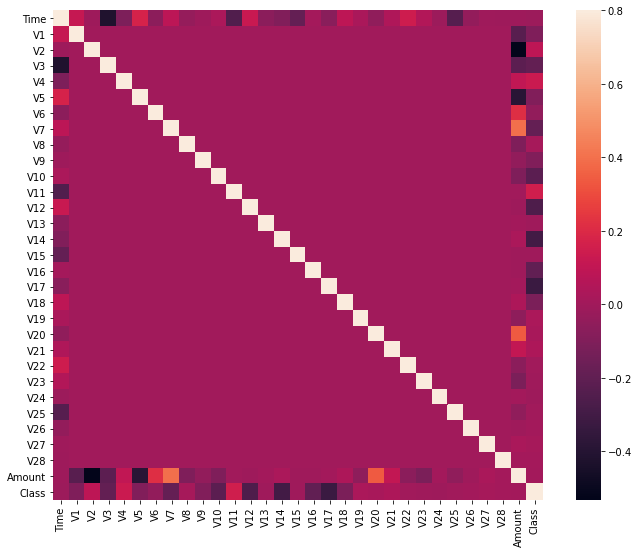

In [11]:
#correlation to understand which features are relevant for prediction
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

#observation:
v2 and v5 have high negative correlation with Amount
slight correlation of v20 and amount



In [12]:
#use of stratify 
#For example, if variable y is a binary categorical variable 
#with values 0 and 1 and there are 25% of zeros and 75% of ones,
#stratify=y will make sure that your random split has 25% of 0's and 
#75% of 1's

In [13]:
from sklearn.model_selection import train_test_split 
x = df.drop("Class", axis = 1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42, stratify = y)

In [14]:
y_train.value_counts()

0    190490
1       330
Name: Class, dtype: int64

In [15]:
y_test.value_counts()

0    93825
1      162
Name: Class, dtype: int64

In [16]:
len(df[df['Class']==0])

284315

In [17]:
len(df[df['Class']==1])

492

In [18]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
# predictions
y_pred = rfc.predict(x_test)

In [19]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
  
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9994999308414994
The precision is 0.9323308270676691
The recall is 0.7654320987654321
The F1-Score is 0.8406779661016949
The Matthews correlation coefficient is0.8445333841721461


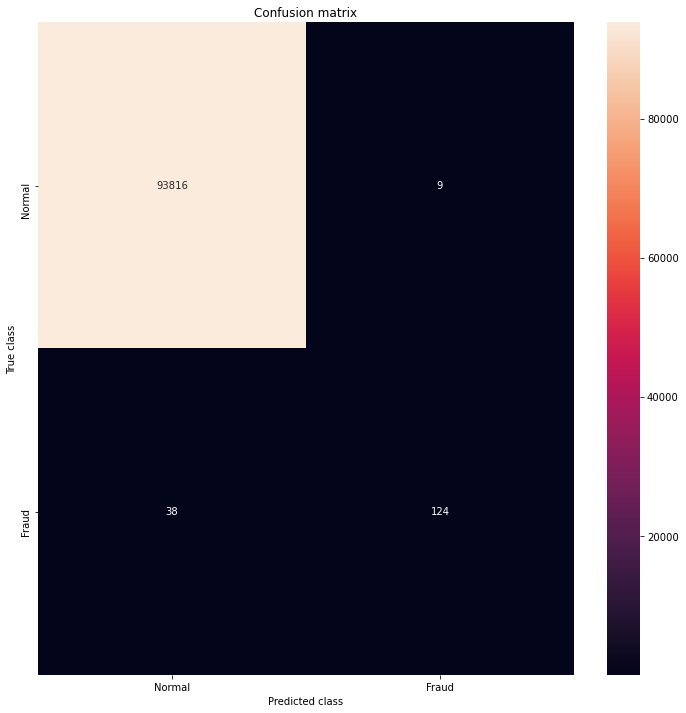

In [20]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [21]:
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest: 47
0.9994999308414994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.93      0.77      0.84       162

    accuracy                           1.00     93987
   macro avg       0.97      0.88      0.92     93987
weighted avg       1.00      1.00      1.00     93987



<Figure size 648x504 with 0 Axes>

As you can see with our Random Forest Model we are getting a better result even for the recall which is the most tricky part.

